# Cellule d'entraînement
Ce notebook sert à l'entraînement de réseaux RNN-based

## Choix des paramètres:


Attention ce notebook est encore en développement, pour l'instant les paramètres disponibles sont :

    - optimizer : Adam
    - lossFunction : CrossEntropy
    - model_type : rnn, lstm, gru
    - alphabet : a0, a1, a2, a3, a5
    
Note : use_Paul_distance n'est disponible que pour l'alphabet a0 pour l'instant

In [62]:
params = {
        'print_every': 5,
        'plot_every': 5,
        'optimizer': "Adam",
        'lossFunction': "CrossEntropy",
        'model_type': "rnn",
        'alphabet': 'a0',
        'sequence_lenght': 16, 
        'using_cuda': True,
        'batch_size': 512,
        'shuffle': True, 
        'num_workers': 6,
        'hidden_size': 512,
        'num_layers': 2,
        'dropout': 0.05,
        'learning_rate': 5e-2, 
        'epochs': 50,
        'use_Paul_distance': True}

from GRUClass import MYGRU
from RNNClass import MYRNN
from LSTMClass import MYLSTM
import torch
import os
from utilities import chordUtil
from utilities.chordUtil import *


dropout = params['dropout']
model_type = params['model_type']
num_layers = params['num_layers']
hidden_size = params['hidden_size']
alphabet = params['alphabet']
sequence_lenght = params['sequence_lenght']
#dropoutstr = str(dropout).replace('.',',')
model_string = "models/"+model_type+str(num_layers)+"layers"+str(hidden_size)+"blocks"+alphabet+"alphabet"+str(sequence_lenght)+"lenSeq.pt"


# Getting alphabet size :
rootname = "inputs/jazz_xlab/"
filenames = os.listdir(rootname)
dictChord, listChord = chordUtil.getDictChord(eval(alphabet))
alphabet_size = len(dictChord)
#print(dictChord)

## Create a new network or load a trained one

### Create :

In [63]:
if model_type == "gru":
    myNetwork = MYGRU(alphabet_size, hidden_size, num_layers, dropout)
elif model_type == "lstm":
    myNetwork = MYLSTM(alphabet_size, hidden_size, num_layers, dropout)
elif model_type == "rnn":
    myNetwork = MYRNN(alphabet_size, hidden_size, num_layers, dropout)

### Load :

In [3]:
myNetwork = torch.load(model_string)

FileNotFoundError: [Errno 2] No such file or directory: 'models/gru4layers512blocksa0alphabet16lenSeq0,05dropout.pt'

# Train and Test the Network on the RealBook dataset

In [73]:
params['epochs']=100
params['learning_rate']=1e-4
params['dropout']=0.01

myNetwork.trainAndTest(**params)

Trying using Cuda ...
OK
Start training
Train : 0m 6s (5 5%) loss : 0.0039, accuracy : 66.0258%
Test : 0m 7s (5 5%) loss : 0.0031, accuracy : 66.2619%
Train : 0m 13s (10 10%) loss : 0.0042, accuracy : 65.6741%
Test : 0m 14s (10 10%) loss : 0.0027, accuracy : 66.3322%
Train : 0m 20s (15 15%) loss : 0.0038, accuracy : 67.4560%
Test : 0m 21s (15 15%) loss : 0.0030, accuracy : 65.5394%
Train : 0m 27s (20 20%) loss : 0.0041, accuracy : 66.4009%
Test : 0m 27s (20 20%) loss : 0.0029, accuracy : 66.0211%
Train : 0m 34s (25 25%) loss : 0.0042, accuracy : 67.5264%
Test : 0m 34s (25 25%) loss : 0.0028, accuracy : 66.3522%
Train : 0m 41s (30 30%) loss : 0.0036, accuracy : 66.6589%
Test : 0m 41s (30 30%) loss : 0.0030, accuracy : 67.1350%
Train : 0m 47s (35 35%) loss : 0.0041, accuracy : 67.2685%
Test : 0m 48s (35 35%) loss : 0.0028, accuracy : 67.0045%
Train : 0m 54s (40 40%) loss : 0.0035, accuracy : 67.1981%
Test : 0m 55s (40 40%) loss : 0.0030, accuracy : 65.9007%
Train : 1m 2s (45 45%) loss : 

# Training and testing results

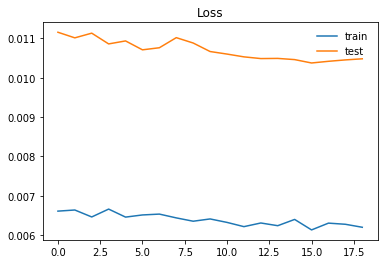

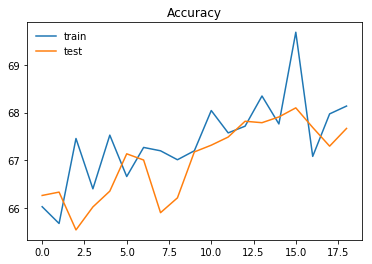

In [74]:
myNetwork.plotLastTraining()

# Save the Model

In [9]:
torch.save(myNetwork,myNetwork.toString(**params))

print("model saved as : "+myNetwork.toString(**params))

model saved as : models/lstm2layers512blocksa0alphabet16lenSeq.ptPaul_distance


# Results of all training sessions
Si une courbe n'apparait pas, c'est sûrement qu'elle est d'une couleur trop claire.

['aqua', 'peru', 'tomato', 'darkviolet']


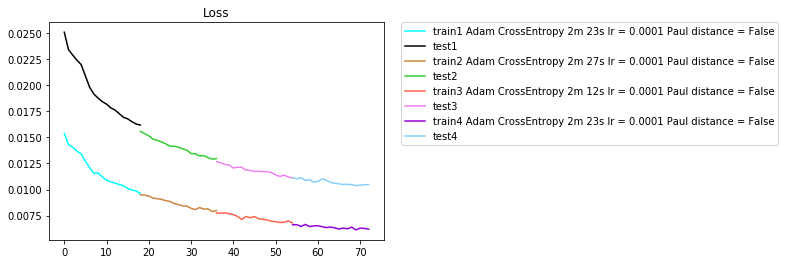

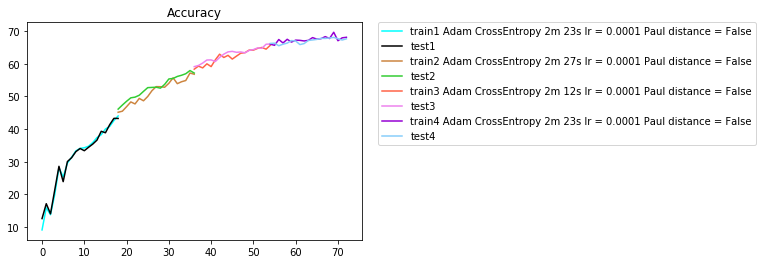

In [80]:
myNetwork.plotAllTraining()

# Chords generation from a sequence :

In [76]:
test_sequence = ["C:maj","F:maj","C:maj","C:maj",
                 "F:maj","F:maj","C:maj","C:maj",
                 "G:maj","F:maj","C:maj","G:maj",
                 "C:maj","C:maj","F:maj","G:maj"]
myNetwork.generateFromSequence(test_sequence, generation_lenght=64,
                               alphabet = 'a0',sampling=True, 
                               using_cuda=True, silent=True)

Trying using Cuda ...
OK
['C:maj', 'F:maj', 'C:maj', 'C:maj']
['F:maj', 'F:maj', 'C:maj', 'C:maj']
['G:maj', 'F:maj', 'C:maj', 'G:maj']
['C:maj', 'C:maj', 'F:maj', 'G:maj']
generated :
['G:maj', 'C:maj', 'C:maj', 'C:maj']
['C:maj', 'G:maj', 'C:maj', 'G:maj']
['C:maj', 'G:maj', 'C:maj', 'C:maj']
['C:maj', 'C:maj', 'C:maj', 'C:maj']
['C:maj', 'C:maj', 'C:maj', 'G:maj']
['C:maj', 'G:maj', 'G:maj', 'C:maj']
['C:maj', 'C:maj', 'C:maj', 'C:maj']
['C:maj', 'C:maj', 'C:maj', 'G:maj']
['G:maj', 'C:maj', 'G:maj', 'G:maj']
['C:maj', 'G:maj', 'G:maj', 'G:maj']
['C:maj', 'C:maj', 'C:maj', 'C:maj']
['C:maj', 'C:maj', 'G:maj', 'C:maj']


# Training memory :
Les données relatifs aux entraînements sont stockées dans trainingData

In [6]:
print(["training number","optimizer used","LossFunction used","train loss","test loss","train accuracy","test accuracy","time", "use_Paul_distance"])
print("\n")
print(myNetwork.trainingData)

['training number', 'optimizer used', 'LossFunction used', 'train loss', 'test loss', 'train accuracy', 'test accuracy', 'time', 'use_Paul_distance']


[[0, 1], ['None', 'Adam'], ['None', 'CrossEntropy'], [[0], [0.061331410331329286, 0.05056840424313922, 0.03925022195964571, 0.03496878058308205]], [[0], [0.023848622059041973, 0.021959358620655026, 0.020306236830110003, 0.0192729806449036]], [[0], [12.180539273153576, 19.413833528722158, 24.92379835873388, 27.819460726846422]], [[0], [13.853487205218265, 18.886101354741598, 23.9136979427998, 28.003010536879074]], [0, '1m 8s'], [0, 0.0005], ['No', True]]


# Fine tuning on the ToyDataset :

### Note : only works with a0 alphabet!

In [3]:
params['epochs']=100
params['learning_rate']=1e-4
params['dropout']=0.0
myNetwork.trainAndTestOnToyDataset(**params)

Trying using Cuda ...
OK
Start training
Train : 0m 4s (5 10%) loss : 0.5141, accuracy : 12.0661%
Test : 0m 4s (5 10%) loss : 1.6639, accuracy : 4.2254%
Train : 0m 8s (10 20%) loss : 0.1905, accuracy : 13.5537%
Test : 0m 9s (10 20%) loss : 0.7667, accuracy : 22.6761%
Train : 0m 13s (15 30%) loss : 0.1980, accuracy : 56.0331%
Test : 0m 14s (15 30%) loss : 1.7245, accuracy : 56.4789%
Train : 0m 18s (20 40%) loss : 0.2113, accuracy : 23.3058%
Test : 0m 18s (20 40%) loss : 2.6933, accuracy : 23.2394%
Train : 0m 22s (25 50%) loss : 0.1636, accuracy : 60.3306%
Test : 0m 22s (25 50%) loss : 2.0100, accuracy : 46.8310%
Train : 0m 26s (30 60%) loss : 0.2610, accuracy : 35.5372%
Test : 0m 27s (30 60%) loss : 2.8418, accuracy : 45.2113%
Train : 0m 31s (35 70%) loss : 0.3655, accuracy : 56.3636%
Test : 0m 31s (35 70%) loss : 3.1907, accuracy : 57.8873%
Train : 0m 35s (40 80%) loss : 0.2313, accuracy : 55.3719%
Test : 0m 36s (40 80%) loss : 1.9005, accuracy : 57.8169%
Train : 0m 40s (45 90%) loss : 

# Plot Training results

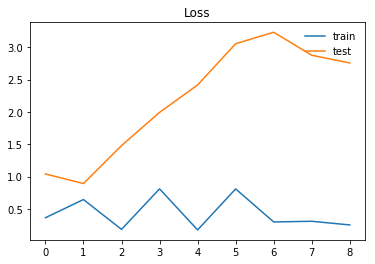

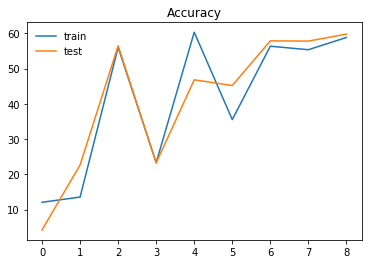

In [4]:
myNetwork.plotLastTraining()

# Test generating from a sequence

The ToyDataset is too poor to give good results, too many chords are classified as "N"

In [5]:
test_sequence = ["C:maj","F:maj","C:maj","C:maj",
                 "F:maj","F:maj","C:maj","C:maj",
                 "G:maj","F:maj","C:maj","G:maj",
                 "C:maj","C:maj","F:maj","G:maj"]
myNetwork.generateFromSequence(test_sequence, generation_lenght=64,
                               alphabet = 'a0',sampling=True, 
                               using_cuda=True, silent=True)

Trying using Cuda ...
OK
['C:maj', 'F:maj', 'C:maj', 'C:maj']
['F:maj', 'F:maj', 'C:maj', 'C:maj']
['G:maj', 'F:maj', 'C:maj', 'G:maj']
['C:maj', 'C:maj', 'F:maj', 'G:maj']
generated :
['N', 'N', 'N', 'N']
['N', 'N', 'N', 'N']
['N', 'N', 'N', 'N']
['N', 'N', 'N', 'N']
['N', 'N', 'N', 'N']
['N', 'N', 'N', 'N']
['N', 'N', 'N', 'N']
['N', 'N', 'N', 'N']
['N', 'N', 'N', 'N']
['N', 'N', 'N', 'N']
['N', 'N', 'N', 'N']
['N', 'N', 'N', 'N']
